<a href="https://colab.research.google.com/github/Brandonj171/Brandonj171/blob/main/BinaryClassificationwithBreastCancerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.datasets import *
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.svm import SVC


In [30]:
data = load_breast_cancer()

df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
sample_size = df.shape[0]
print(f"Sample size: {sample_size}")

target_size = df['target'].nunique()
print(f"Target size: {target_size}")

print(df['target'].value_counts())

Sample size: 569
Target size: 2
target
1    357
0    212
Name: count, dtype: int64


In [32]:
features = df.drop(columns = ['target'])
label = df['target']

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=41)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)
#y_pred

y_pred_proba = clf.predict_proba(X_test)
#y_pred_proba

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)
print(y_pred_proba)
print(y_pred_binary)

[[2.11462458e-03 9.97885375e-01]
 [1.48766545e-01 8.51233455e-01]
 [1.26728714e-01 8.73271286e-01]
 [1.04140607e-02 9.89585939e-01]
 [6.80263107e-04 9.99319737e-01]
 [2.05099543e-03 9.97949005e-01]
 [1.00000000e+00 5.70465104e-33]
 [9.99999912e-01 8.75742823e-08]
 [9.99621417e-01 3.78583227e-04]
 [3.76454964e-04 9.99623545e-01]
 [9.99999996e-01 3.57661709e-09]
 [9.95720729e-01 4.27927086e-03]
 [9.99638753e-01 3.61246616e-04]
 [6.03848846e-03 9.93961512e-01]
 [3.23935893e-03 9.96760641e-01]
 [1.74650125e-04 9.99825350e-01]
 [1.10910536e-03 9.98890895e-01]
 [1.11684012e-02 9.88831599e-01]
 [7.94570931e-03 9.92054291e-01]
 [2.00848860e-02 9.79915114e-01]
 [1.12535979e-01 8.87464021e-01]
 [6.89232996e-04 9.99310767e-01]
 [5.40383020e-01 4.59616980e-01]
 [1.47225950e-02 9.85277405e-01]
 [8.33929805e-02 9.16607019e-01]
 [1.20691888e-03 9.98793081e-01]
 [2.32768854e-03 9.97672311e-01]
 [1.19455728e-03 9.98805443e-01]
 [1.48228114e-04 9.99851772e-01]
 [3.12192769e-03 9.96878072e-01]
 [9.365331

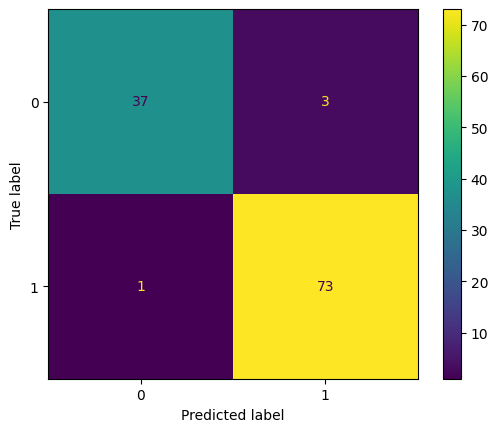

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [39]:
report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'])
print(report)

              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        40
      Benign       0.96      0.99      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [40]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy using score methood {accuracy:.4f}")

Accuracy using score methood 0.9649


In [41]:
  from sklearn.model_selection import KFold

In [42]:
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [43]:
 from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(estimator=nb, X=data.data,y=data.target, cv=kfold)

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9386


In [64]:
# Define the SVC model
svc = SVC(kernel='linear', random_state=42)

# Train the model
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9825


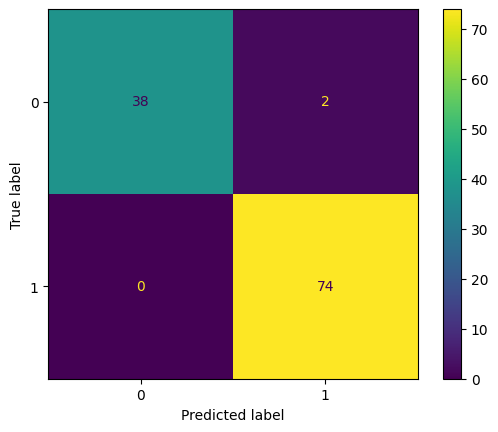

In [69]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [68]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

